In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

import preprocessing
import algorithms
import plots
import postprocessing

In [2]:
DATA_PATH_1 = Path("../data/data1.txt")
DATA_PATH_2 = Path("../data/data2.txt")

# Part 1

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams.

In [3]:
raw_data = preprocessing.read_data(DATA_PATH_1)
x, y = preprocessing.split_input_output(raw_data, (0, 1), (2,))
x = preprocessing.include_intercept(x)
data = preprocessing.Data.from_data(x, y)

## Visualizing the data
Before starting to implement any learning algorithm, it is always good to
visualize the data if possible. In the first part of ex2.m, the code will load the
data and display it on a 2-dimensional plot by calling the function plotData.

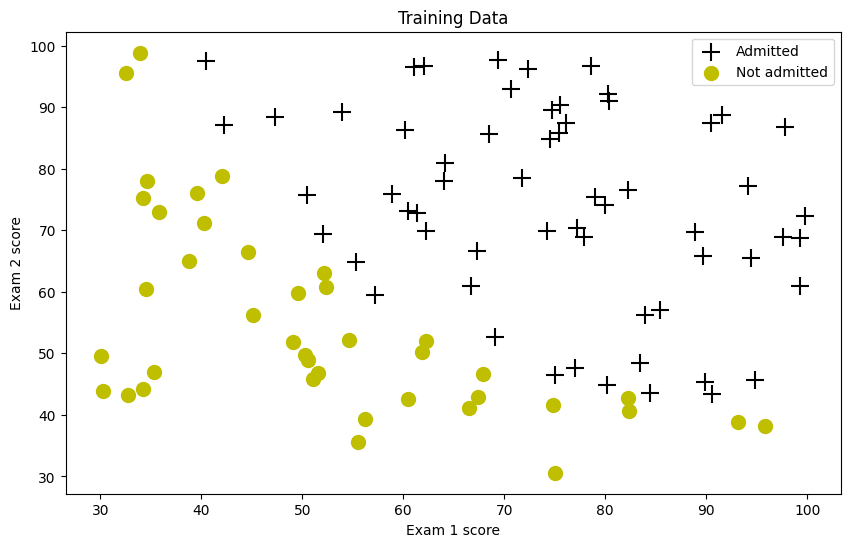

In [4]:
plots.plot_data(
    data.positive,
    data.negative,
    label_positive="Admitted",
    label_negative="Not admitted",
    label_x="Exam 1 score",
    label_y="Exam 2 score",
)

## Cost function and gradient
Now you will implement the cost function and gradient for logistic regression.
Complete the code in costFunction.m to return the cost and gradient.
Recall that the cost function in logistic regression is

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1 - h_{\theta}(x^{(i)}))]$$

and the gradient of the cost is a vector of the same length as θ where the j th
element (for j = 0, 1, . . . , n) is defined as follows:

$$\frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gra-
dient, the formula is actually different because linear and logistic regression
have different definitions of hθ (x).

In [5]:
model = algorithms.LogisticRegression()

## Verify the initial setup
Once you are done, ex2.m will call your costFunction using the initial
parameters of θ. You should see that the cost is about 0.693.

In [6]:
# the expected value of cost is 0.693
model.theta = np.array([0, 0, 0])
cost = model.cost(x, y)
print("Part 1:\n")
print("Computed cost with the initial value of theta:\n")
print(f"{cost: .2f}\n")

Part 1:

Computed cost with the initial value of theta:

 0.69



## Verify the results

Assuming you have implemented gradient descent and computeCost correctly, your value of
should never increase, and should converge to a steady value by the end of the algorithm.

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


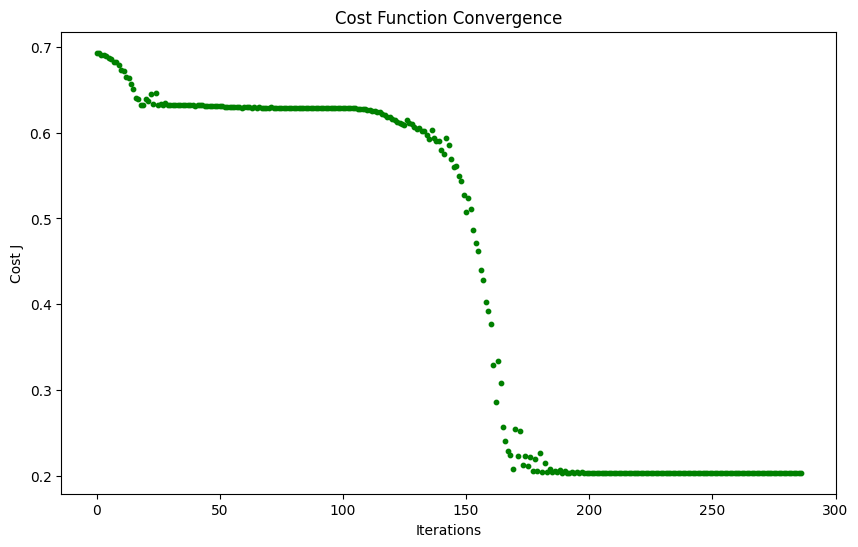

In [7]:
model.fit(x, y)
plots.plot_cost_function(np.array(model.cost_history))

## Training data with decision boundary

$h_{\theta}(x) = g(z)$, where g is the sigmoid function and $z=\Theta^Tx$.

$\Theta_1 + \Theta_2x_2+ \Theta_3x_3=0$ is the diecision boundary.

The boundary line equation: $x_3=\frac{-(\Theta_1 + \Theta_2x_2)}{\Theta_3}$

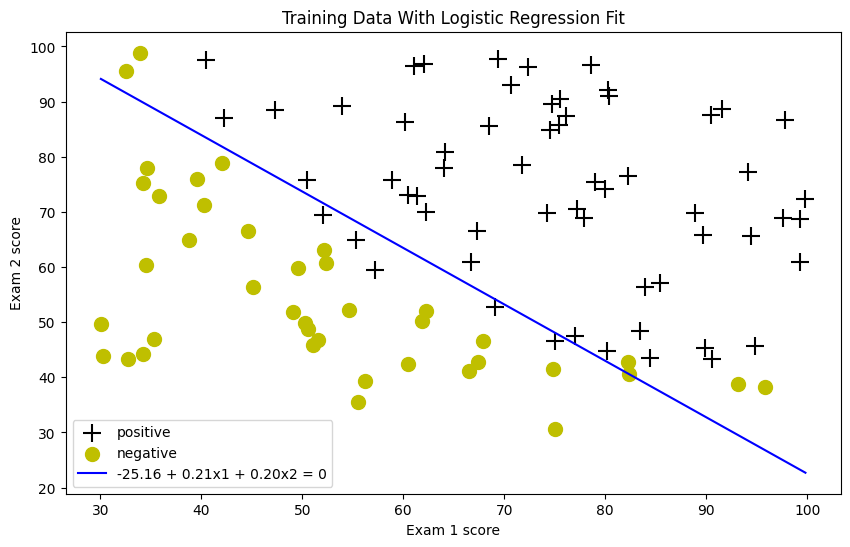

In [8]:
plots.plot_logistic_regression_fit(
    data.positive,
    data.negative,
    model,
    label_positive="Admitted",
    label_negative="Not admitted",
    label_x="Exam 1 score",
    label_y="Exam 2 score",
)

In [9]:
# the expected value of cost is 0.203
cost = model.cost(x, y)
print("Computed cost with the optimal value of theta:\n")
print(f"{cost: .2f}\n")

Computed cost with the optimal value of theta:

 0.20



## Evaluating logistic regression
After learning the parameters, you can use the model to predict whether a
particular student will be admitted. For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

In [10]:
exam_1_score = 45
exam_2_score = 85
values = [1, exam_1_score, exam_2_score]
print(
    "\nFor a student with an Exam 1 score of 45 and an Exam 2 score of 85, computed admission probability is:\n"
)
print(f"{model.hypothesis_function(values): .2f}\n")


For a student with an Exam 1 score of 45 and an Exam 2 score of 85, computed admission probability is:

 0.78



## Postprocessing
After you have completed the code in predict.m, the ex2.m script will
proceed to report the training accuracy of your classifier by computing the
percentage of examples it got correct.

In [11]:
print("\nCorrect predictions for training data:\n")
print(f"{postprocessing.accuracy(x, y, model): .2f}\n")


Correct predictions for training data:

 0.89



# Part 2
In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.

Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [12]:
data = preprocessing.read_data(DATA_PATH_2)
x, y = preprocessing.split_input_output(data, (0, 1), (2,))
x = preprocessing.include_intercept(x)
data = preprocessing.Data.from_data(x, y)

## Visualizing the data
Similar to the previous parts of this exercise, plotData is used to generate a
figure like Figure 3, where the axes are the two test scores, and the positive
(y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

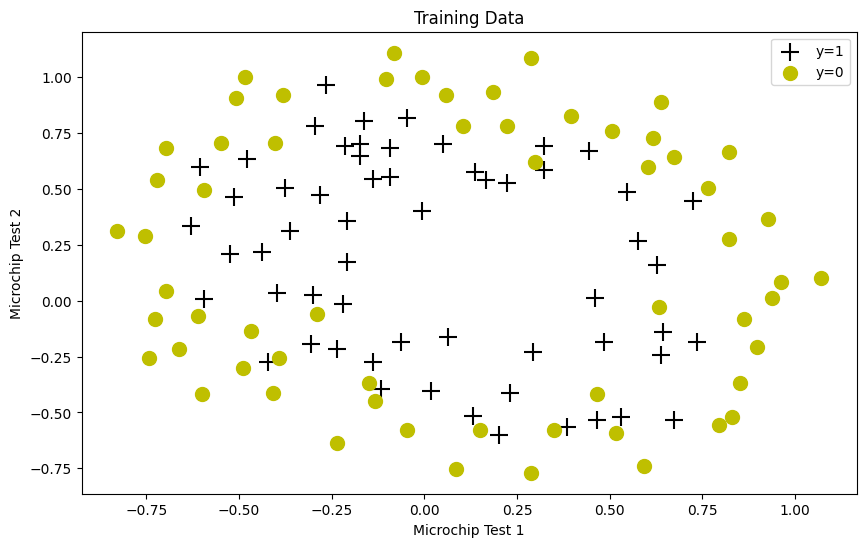

In [13]:
plots.plot_data(
    data.positive,
    data.negative,
    label_positive="y=1",
    label_negative="y=0",
    label_x="Microchip Test 1",
    label_y="Microchip Test 2",
)

## Feature mapping
One way to fit the data better is to create more features from each data
point. In the provided function mapFeature.m, we will map the features into
all polynomial terms of x1 and x2 up to the sixth power.

$$mapFeature(x) = \begin{bmatrix}
  1 \\
  x_1 \\
  x_2 \\
  x_1^2 \\
  x_1x_2 \\
  x_2^2 \\
  x_1^3 \\
  \vdots \\
  x_2^6 \\
\end{bmatrix}
$$

As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.

In [14]:
mapper = preprocessing.FeatureMapper(6)
x_mapped = mapper.map(x[:, 1], x[:, 2])

## Cost function and gradient
Now you will implement code to compute the cost function and gradient for
regularized logistic regression. Complete the code in costFunctionReg.m to
return the cost and gradient.
Recall that the regularized cost function in logistic regression is

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

Note that you should not regularize the parameter θ0 . In Octave/MAT-
LAB, recall that indexing starts from 1, hence, you should not be regularizing
the theta(1) parameter (which corresponds to θ0 ) in the code. The gradient
of the cost function is a vector where the j th element is defined as follows:

$$\frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \quad for\;j=0$$

$$\frac{\partial}{\partial \theta_j} J(\theta) = (\frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j \quad for\;j\ge1$$

In [15]:
model = algorithms.RegularizedLogisticRegression()
model.fit(x_mapped, y)

/home/adam/Stanford-Machine-Learning/src/exercise_2/src/algorithms.py:162: RuntimeWarning: Maximum number of iterations has been exceeded.
  self.theta = optimize.fmin(


## Postprocessing
Once you are done, ex2 reg.m will call your costFunctionReg function
using the initial value of θ (initialized to all zeros). You should see that the
cost is about 0.693.

In [16]:
# the expected value of cost is 0.693
print("\nPart 2:\n")
cost = model.cost(x_mapped, y)
print("Computed cost with the optimal value of theta:\n")
print(f"{cost: .2f}\n")


Part 2:

Computed cost with the optimal value of theta:

 0.69



## Plotting the decision boundary
To help you visualize the model learned by this classifier, we have pro-
vided the function plotDecisionBoundary.m which plots the (non-linear)
decision boundary that separates the positive and negative examples. In
plotDecisionBoundary.m, we plot the non-linear decision boundary by com-
puting the classifier’s predictions on an evenly spaced grid and then and drew
a contour plot of where the predictions change from y = 0 to y = 1.

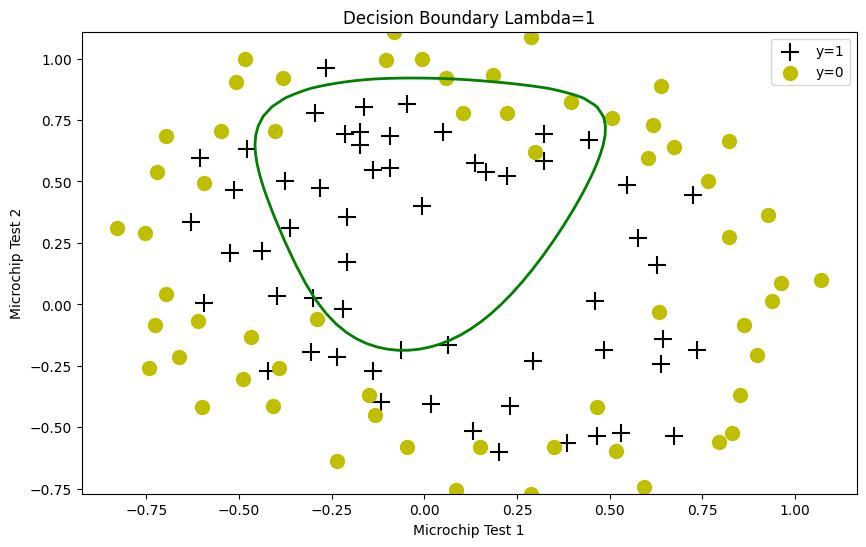

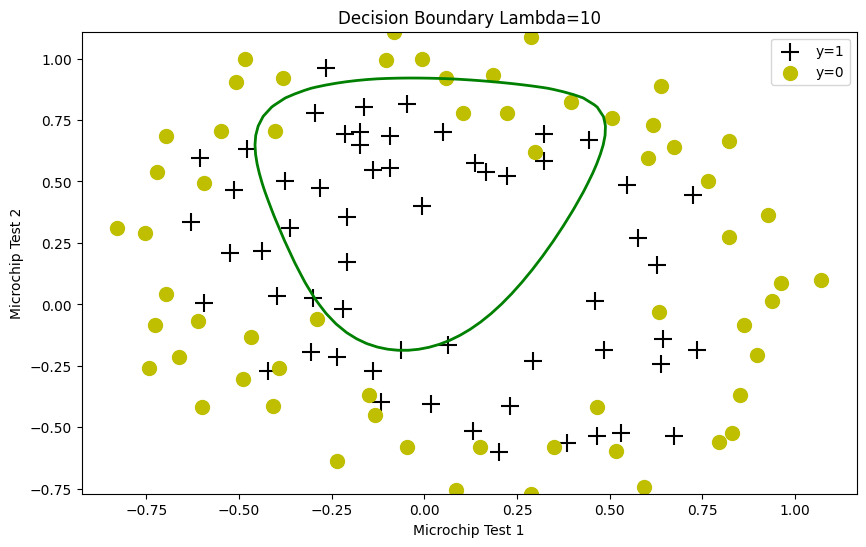

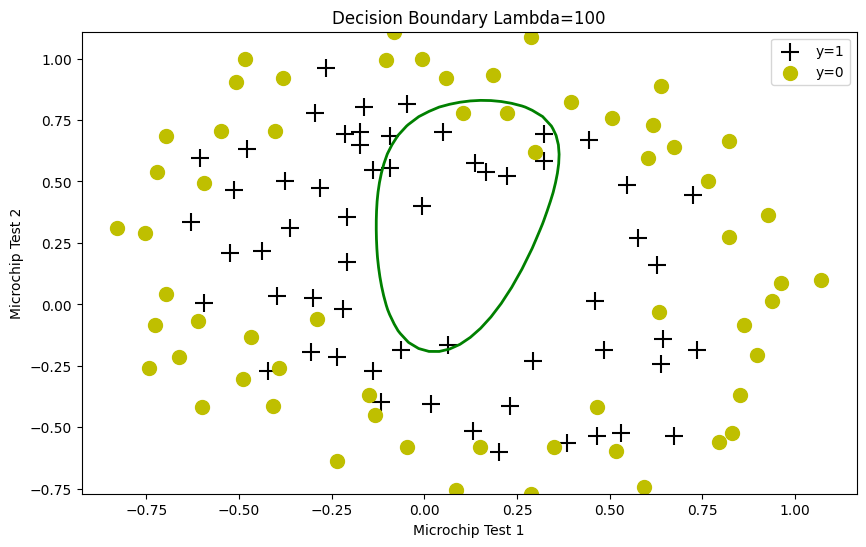

In [18]:
for _lambda in (1, 10, 100):
    model = algorithms.RegularizedLogisticRegression(_lambda)
    model.fit(x_mapped, y)
    plots.plot_boundary_as_contour(
        data.positive,
        data.negative,
        model,
        title=f"Decision Boundary Lambda={_lambda}",
        label_positive="y=1",
        label_negative="y=0",
        label_x="Microchip Test 1",
        label_y="Microchip Test 2",
    )